<a href="https://colab.research.google.com/github/prakhar-chaurasiya/final_project_nism/blob/main/order_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

to do


*   demand and supply
*   buy max price and sell min price per second



In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
np.set_printoptions(suppress=True)

order_file = '/content/drive/MyDrive/Colab Notebooks/FA/HIGHFREQ-DATA/highfreq/reliance.order'
order_df = pd.read_csv(order_file, sep='|', header=None)
order_df.columns =['session', 'orderid', 'side', 'action', 'order_time', 'price', 'fquant', 'dquant', 'market', 'ioc', 'stoploss', 'triggerprice']
jiffy = 65536
ist = 330*60 # this is to be added in local machine (5:30 = 330*60 sec)
order_df['time'] = order_df['order_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy))#.strftime('%Y-%m-%d %H:%M:%S'))
# order_df['min'] = order_df['order_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy).strftime('%H:%M:%S'))
# order_df['sec'] = pd.to_datetime(order_df['time']).dt.strftime("%H%M%S").astype('int')
order_df['min'] = pd.to_datetime(order_df['time']).dt.strftime("%H%M").astype('int')
order_df['market_num'] = pd.get_dummies(order_df['market'], drop_first=True)

In [92]:
order_df

,session,orderid,side,action,order_time,price,fquant,dquant,market,ioc,stoploss,triggerprice,time,min,market_num
0,PO,1300000000002995,S,1,84908467824383,200000,40,0,N,N,N,0,2011-01-21 09:00:00.152328,900,0
1,PO,1300000000003004,S,1,84908467824432,202500,400,0,N,N,N,0,2011-01-21 09:00:00.153076,900,0
2,PO,1300000000003121,S,1,84908467824485,201640,5,0,N,N,N,0,2011-01-21 09:00:00.153885,900,0
3,PO,1300000000003099,S,1,84908467824512,212700,55,0,N,N,N,0,2011-01-21 09:00:00.154297,900,0
4,PO,1300000000003091,B,1,84908467824522,189540,1,0,N,N,N,0,2011-01-21 09:00:00.154449,900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620648,RM,1300000016436178,B,3,84910125129214,204140,1250,0,N,N,N,0,2011-01-21 16:01:28.617157,1601,0
10620649,RM,1300000001389717,B,3,84910125129215,203510,500,0,N,N,N,0,2011-01-21 16:01:28.617172,1601,0
10620650,RM,1300000001483931,B,3,84910125129216,203895,500,0,N,N,N,0,2011-01-21 16:01:28.617188,1601,0
10620651,RM,1300000012830678,B,3,84910125129217,204070,250,0,N,N,N,0,2011-01-21 16:01:28.617203,1601,0


In [42]:
def normalize_data(x : np.array) -> np.array:
  return (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0))

In [44]:
def standardize_data(x : np.array) -> np.array:
  return (x - x.mean(axis=0))/x.std(axis=0)

In [3]:
timeframe = 'min'
allsides = order_df[['side', timeframe, 'price', 'fquant', 'action', 'market_num']].values

In [ ]:
trading_time = []
for i in range(9, 16):
  if i in range(10, 15):
    for j in range(0, 60):
      trading_time.append(i*100+j)
  elif i == 9:
    for j in range(15, 60):
      trading_time.append(i*100+j)
  else:
    for j in range(0, 30):
      trading_time.append(i*100+j)
trading_time

In [64]:
n = len(trading_time)

In [65]:
n

375

buy side analysis

In [4]:
buy = allsides[allsides[:, 0] == 'B'][:, 1:]
buy_tf = tf.convert_to_tensor(buy, dtype=tf.int32)
rows, row_idx = np.unique(buy_tf[:, 0], return_inverse=True)
buy_orders = np.zeros((rows.shape[0], 5), dtype=np.float32)
buy_df = pd.DataFrame()
# for i, r in enumerate(rows):
#   buy_tf[buy_tf[:, 0]==r][:, 1].numpy()



In [59]:
buy_tf

<tf.Tensor: shape=(4766319, 5), dtype=int32, numpy=
array([[   900, 189540,      1,      1,      0],
       [   900, 191640,      5,      1,      0],
       [   900,      0,      2,      1,      1],
       ...,
       [  1601, 203895,    500,      3,      0],
       [  1601, 204070,    250,      3,      0],
       [  1601, 203805,    250,      3,      0]], dtype=int32)>

In [ ]:
# buy_train = np.zeros(n)
# for i in trading_time:
#   temp = buy_tf[buy_tf[:, 0]==i][:, 1:]
#   buy_train[i] = standardize_data(temp.numpy())
# buy_train
buy_train = list()
for i in trading_time:
  temp = buy_tf[buy_tf[:, 0]==i][:, 1:]
  buy_train.append(standardize_data(temp.numpy()))
buy_train

In [83]:
buy_train = np.array(buy_train)
buy_train

array([array([[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
              [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
              [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
              ...,
              [ 0.18010692, -0.35890328, -0.31955649, -0.15562812],
              [ 0.18010692, -0.34981201, -2.0278076 , -0.15562812],
              [ 0.17325691, -0.51042441,  0.53456906, -0.15562812]]),
       array([[ 0.10337096,  0.36029564,  0.59228019, -0.1502324 ],
              [ 0.13395803, -0.71861854,  0.59228019, -0.1502324 ],
              [ 0.11395879, -0.42397531,  0.59228019, -0.1502324 ],
              ...,
              [ 0.17042723, -0.70128659, -1.98562793, -0.1502324 ],
              [ 0.37815041, -0.63629176, -1.98562793, -0.1502324 ],
              [ 0.17244396, -0.66662268, -1.98562793, -0.1502324 ]]),
       array([[ 0.15340501, -0.83648514, -1.90450993, -0.13018891],
              [ 0.15648941, -0.79712357, -1.90450993, -0.13018891],
      

In [ ]:
list(map(lambda x: x.shape[0], buy_train))

In [5]:
pd.DataFrame(buy_tf[buy_tf[:, 0]==1300][:, 1:].numpy())

,0,1,2,3
0,203905,3,1,0
1,203895,1206,3,0
2,203845,1159,3,0
3,203815,250,4,0
4,203895,8,4,0
...,...,...,...,...
24997,202755,2,4,0
24998,202655,2,4,0
24999,203780,204,3,0
25000,203375,2,4,0


In [14]:
temp = buy_tf[buy_tf[:, 0]==1300][:, 1:]
temp[temp[:, 0] == 0].numpy()
temp[temp[:, 0] != 0][:, 0].numpy()

array([203905, 203895, 203845, ..., 203780, 203375, 203780], dtype=int32)

In [58]:
temp

<tf.Tensor: shape=(25002, 4), dtype=int32, numpy=
array([[203905,      3,      1,      0],
       [203895,   1206,      3,      0],
       [203845,   1159,      3,      0],
       ...,
       [203780,    204,      3,      0],
       [203375,      2,      4,      0],
       [203780,    204,      1,      0]], dtype=int32)>

In [ ]:
normalize_data(temp.numpy())

In [ ]:
np.unique(normalize_data(temp.numpy())[:, 0])

In [70]:
standardize_data(temp.numpy())

array([[ 0.10975634, -0.91282162, -2.45056054, -0.0792381 ],
       [ 0.10913664,  3.64080768, -0.49077055, -0.0792381 ],
       [ 0.10603817,  3.46290196, -0.49077055, -0.0792381 ],
       ...,
       [ 0.10201016, -0.15199079, -0.49077055, -0.0792381 ],
       [ 0.07691253, -0.91660685,  0.48912445, -0.0792381 ],
       [ 0.10201016, -0.15199079, -2.45056054, -0.0792381 ]])

In [ ]:
np.unique(standardize_data(temp.numpy())[:, 0])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp2 = temp[temp[:, 0] != 0][:, 0]
# temp2[:, 0] =
scaler.fit_transform(temp2)
temp2

In [31]:
temp2.numpy().min(axis=0)

181480

In [19]:
temp2

<tf.Tensor: shape=(24846,), dtype=int32, numpy=array([203905, 203895, 203845, ..., 203780, 203375, 203780], dtype=int32)>

In [19]:
pd.DataFrame(buy_tf[buy_tf[:, 0]==1300][:, 1:].numpy()).groupby(0).get_group(0)[1].sum()

16450

sell side analysis

In [60]:
sell = allsides[allsides[:, 0] == 'S'][:, 1:]

In [61]:
sell_tf = tf.convert_to_tensor(sell, dtype=tf.int32)
rows, row_idx = np.unique(sell_tf[:, 0], return_inverse=True)
sell_orders = np.zeros((rows.shape[0], 5), dtype=np.float32)
# sell_df = pd.DataFrame()

In [62]:
sell_tf

<tf.Tensor: shape=(5854334, 5), dtype=int32, numpy=
array([[   900, 200000,     40,      1,      0],
       [   900, 202500,    400,      1,      0],
       [   900, 201640,      5,      1,      0],
       ...,
       [  1601, 206000,     10,      3,      0],
       [  1601, 205835,      2,      3,      0],
       [  1601, 207995,     25,      3,      0]], dtype=int32)>

order min max price of a second

In [ ]:
all_prices_np = order_df[['market', timeframe, 'price']].values
prices_np = all_prices_np[all_prices_np[:, 0] == 'N'][:, 1:]
prices_tf = tf.convert_to_tensor(prices_np, dtype=tf.int32)
rows, row_idx = np.unique(prices_np[:, 0], return_inverse=True)
ohlc = np.zeros((rows.shape[0], 5), dtype=np.float32)
for i, r in enumerate(rows):
    p = prices_tf[prices_tf[:, 0]==r][:, 1].numpy()
    o = p[0]
    h = p.max()
    l = p.min()
    c = p[-1]
    ohlc[i, 0] = r
    ohlc[i, 1] = o
    ohlc[i, 2] = h
    ohlc[i, 3] = l
    ohlc[i, 4] = c

In [ ]:
ohlc

array([[   900., 200000., 221800., 181480., 214000.],
       [   901., 214000., 221800., 181480., 185000.],
       [   902., 203990., 221800., 181480., 188000.],
       ...,
       [  1558., 205200., 208000., 202145., 202145.],
       [  1559., 206100., 207590., 197550., 202800.],
       [  1601., 191000., 215300., 191000., 203805.]], dtype=float32)

In [ ]:
# pure numpy takes too much of time to execute so use tensorflow
# ohlc1 = np.zeros((rows.shape[0], 5), dtype=np.int32)
# for i, r in enumerate(rows):
#     p = prices_np[prices_np[:, 0]==r][:, 1]
#     o = p[0]
#     h = p.max()
#     l = p.min()
#     c = p[-1]
#     ohlc1[i, 0] = r
#     ohlc1[i, 1] = o
#     ohlc1[i, 2] = h
#     ohlc1[i, 3] = l
#     ohlc1[i, 4] = c
#     print(r)


# Model


In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import Model, Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten, Reshape, TimeDistributed, \
Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, concatenate

In [ ]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(128, 3, activation='relu', input_shape=(timestamp, features)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Conv1D(128, 3, activation='relu', input_shape=(timestamp, features)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(units = 64, return_sequences = True))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(units = 64, return_sequences = False))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Dense(64, activation=tf.keras.activations.tanh))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Dense((covar_shape*covar_shape)))
model_cnn_lstm.add(Reshape((covar_shape, covar_shape)))
model_cnn_lstm.summary()

model_cnn_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

```python
# define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))
# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)
# the second branch opreates on the second input
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
# combine the output of the two branches
combined = concatenate([x.output, y.output])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="linear")(z)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)
```

```python

inputA = Input(shape=(None, 4))
inputB = Input(shape=(None, 4))

buy = Conv1D(16, 3, activation="relu")(inputA)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Conv1D(16, 3, activation="relu")(buy)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Model(inputs=inputA, outputs=buy)

sell = Conv1D(16, 3, activation="relu")(inputB)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Conv1D(16, 3, activation="relu")(sell)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Model(inputs=inputB, outputs=sell)

combined = concatenate([buy.output, sell.output])

final = LSTM(64, return_sequences=True)(combined)
final = LSTM(64, return_sequences=True)(final)
final = LSTM(64, return_sequences=False)(final)
final = Dense(64, activation=tf.keras.activations.tanh)(final)
final = Dense(1, activation="linear")(final)

model = Model(inputs=buy.input, sell.input], outputs=final)
```

In [38]:
inputA = Input(shape=(None, 4))
inputB = Input(shape=(None, 4))

buy = Conv1D(16, 3, activation="relu")(inputA)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Conv1D(16, 3, activation="relu")(buy)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Model(inputs=inputA, outputs=buy)

sell = Conv1D(16, 3, activation="relu")(inputB)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Conv1D(16, 3, activation="relu")(sell)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Model(inputs=inputB, outputs=sell)

combined = concatenate([buy.output, sell.output])

final = LSTM(64, return_sequences=True)(combined)
final = LSTM(64, return_sequences=True)(final)
final = LSTM(64, return_sequences=False)(final)
final = Dense(64, activation=tf.keras.activations.tanh)(final)
final = Dense(1, activation="linear")(final)

model = Model(inputs=[buy.input, sell.input], outputs=final)

In [39]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 4)]    0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 4)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, None, 16)     208         ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, None, 16)     208         ['input_2[0][0]']                
                                                                                            

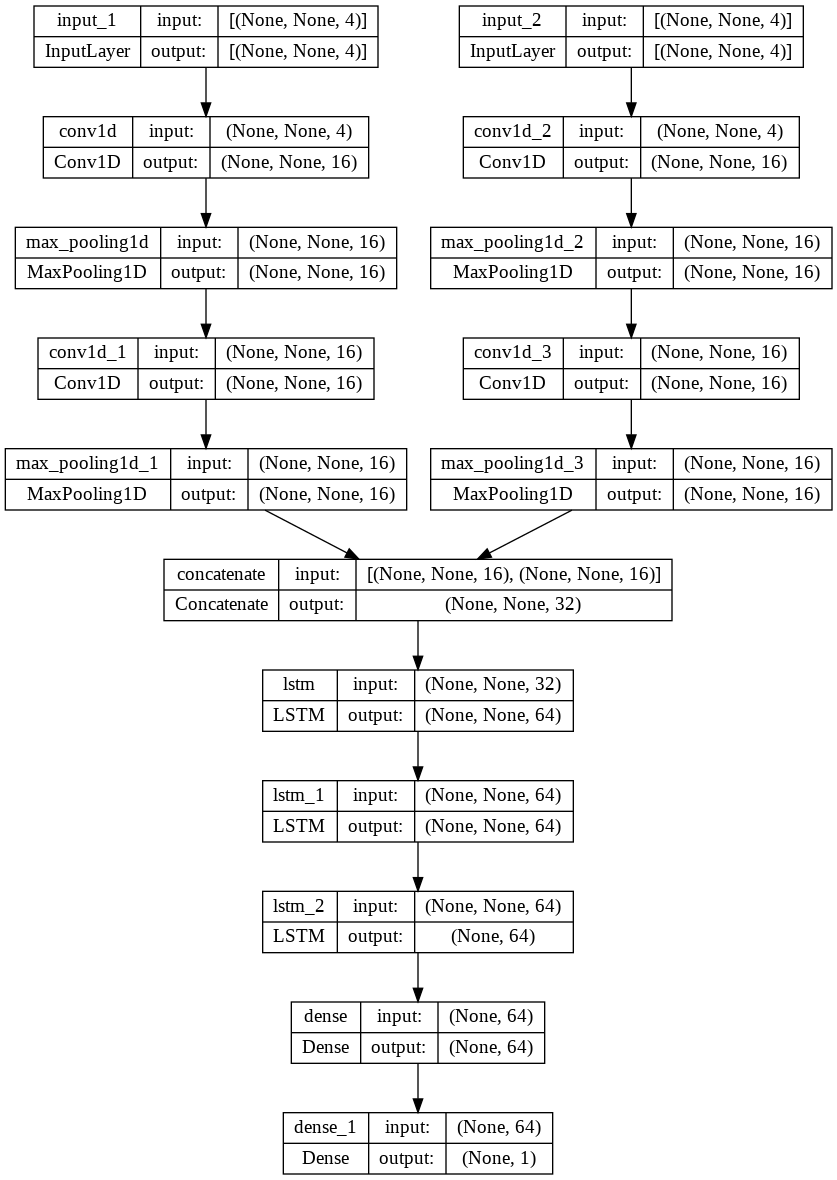

In [40]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
history_cnn_lstm = model_cnn_lstm.fit(X_train, y_train, epochs=10)

# Rough

In [ ]:
order_df['sec'].unique()

array([ 90000,  90001,  90002, ..., 155902, 155957, 160128])

In [ ]:
all_prices_np = order_df[['market', 'sec', 'price']].values
prices_np = all_prices_np[all_prices_np[:, 0] == 'N'][:, 1:]
rows, row_idx = np.unique(prices_np[:, 0], return_inverse=True)
# ohlc = np.zeros((rows.shape[0], 2), dtype=prices_np.dtype)
# for i, (r, id1, id2) in enumerate(zip(rows, np.unique(row_idx), np.unique(row_idx)[1:])):
#     ohlc[i, 0] = r
#     ohlc[i, 1] = prices_np[id1:id2, :]
# ohlc

In [ ]:
prices_tf = tf.convert_to_tensor(prices_np, dtype=tf.int32)
print(prices_tf)